# Analyse exploratoire de la base de données du site d'e-commerce Olist

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

Le site d'e-commerce Olist a fournit un ensemble de datasets pour pouvoir effectuer une segmentation de ces clients. Ci-dessous le schéma expliquant le fonctionnement de ces fichiers.
<img src="MCD.png">

## 1 - Analyses des données en lien avec les clients

In [2]:
df_customers = pd.read_csv("datasets/olist_customers_dataset.csv")
df_geo = pd.read_csv("datasets/olist_geolocation_dataset.csv")
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


- Recherche de données manquantes et dupliquées

In [3]:
df_customers.isnull().mean()

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

In [4]:
df_customers[df_customers.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


Notre jeu de données n'a pas de valeurs manquantes ni de données dupliquées. On va donc pouvoir passer à la suite de l'analyse. 

- Description de l'origine des clients

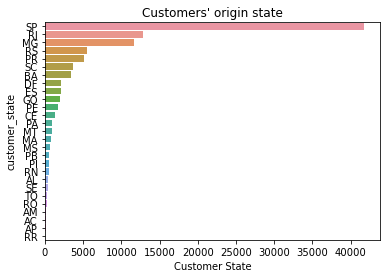

In [5]:
sns.countplot(y="customer_state", data=df_customers, order=df_customers["customer_state"].value_counts().index)
plt.title("Customers' origin state")
plt.xlabel("Customer State")
plt.show()

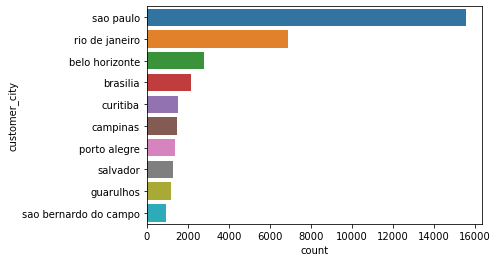

In [6]:
sns.countplot(y="customer_city", data=df_customers, order=df_customers["customer_city"].value_counts().index[:10])
plt.show()

In [7]:
print("Nombre d'id customers :", df_customers["customer_id"].nunique())

Nombre d'id customers : 99441


In [8]:
print("Nombre d'id customers unique:", df_customers["customer_unique_id"].nunique())

Nombre d'id customers unique: 96096


In [9]:
print("Nombre de villes:", df_customers["customer_city"].nunique())

Nombre de villes: 4119


In [10]:
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [12]:
df_customers = pd.merge(df_geo, df_customers,
                        right_on=["customer_zip_code_prefix", "customer_city", "customer_state"], 
                        left_on=["geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"], how="right")
df_customers.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,14409.0,-20.509897,-47.397866,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,14409.0,-20.497396,-47.399241,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
2,14409.0,-20.510459,-47.399553,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
3,14409.0,-20.480940,-47.394161,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
4,14409.0,-20.515413,-47.398194,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
